In [2]:
#Installing all the required packages
!pip install ffmpeg
!pip install imageio-ffmpeg
!pip install imageio==2.4.1
!pip install git+https://github.com/openai/whisper.git
!pip install whisper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-4atkw7ut
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-4atkw7ut
  Resolved https://github.com/openai/whisper.git to commit 6dea21fd7f7253bfe450f1e2512a0fe47ee2d258
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importing all the necessary Libraries
import numpy as np
import pandas as pd
import string
import tkinter
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython.display import Image
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
import moviepy.editor
from tkinter.filedialog import *
import whisper

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
model = whisper.load_model("large")

In [5]:

class sentiment_analyzer():
    AUDIO_FILE_NAME='audiofile.mp3'
    INPUT_VIDEO_NAME="samplevideo.mp4"
    def sentimentAnalyser(self,sentiment_text):
        #Analyzing the overall sentiment of the content
        score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
        negative = score['neg']
        positive = score['pos']
        if negative > positive:
            return "Negataive Sentiment"
        elif positive > negative:
            return "Positive Sentiment"
        else:
            return "Neutral Sentiment"

    #Plotting a Percentage Pie Chart of Emotion Distribution
    def plot_chart(self,emotion_count_list):
        fig, axis1 = plt.subplots(figsize = (9,9))
        total = sum(emotion_count_list.values())
        wedges, texts, _ = axis1.pie(emotion_count_list.values(), autopct=lambda pct: '{:.2f}%'.format(pct), textprops=dict(color="w"))
        axis1.legend(wedges, emotion_count_list.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        axis1.set_title("Emotion Distribution")
        plt.savefig("emotion_distribution.png")
        plt.clf()
        display(Image("emotion_distribution.png"))
    
    def execute(self):
        #Importing the samplevideo file and converting it in audiofile
        video = moviepy.editor.VideoFileClip(self.INPUT_VIDEO_NAME)
        aud = video.audio
        aud.write_audiofile(self.AUDIO_FILE_NAME)
        
        #Converting the audiofile in text and storing it in a Dictionary with key "text"
        transcribed_data = model.transcribe(self.AUDIO_FILE_NAME)
        text_data = transcribed_data["text"]

        #Changing the text in lowercase and cleaning it to make it easier to analyze
        lower_case = text_data.lower()
        clean = lower_case.translate(str.maketrans("","",string.punctuation)).strip()
        
        #Coverting the text in form of tokens
        token_text = word_tokenize(clean,"english")

        #Removing all the stopwords{Words which basically don't show any sentiments
        final_words = []
        for word in token_text:
            if word not in stopwords.words('english'):
                final_words.append(word)
        
        
        emotion_list = []
        #Formatting the sentiment.txt and splitting it in words and the emotion they relate to
        with open('sentiment.txt', 'r') as file:
                for line in file:
                    clean_line = line.replace("\n","").replace(",","").replace("'","").strip()
                    word,emotion = clean_line.split(":")

                    #Creating lists of emotions conveyed by words in final_words
                    if word in final_words:
                        emotion_list.append(emotion)

        #Creating a dictionary that keeps count of all the emotions
        emotion_dict = Counter(emotion_list)
        
        #final sentiment
        sentiment_of_text=self.sentimentAnalyser(clean)
        print(sentiment_of_text)
       
        print(emotion_dict)
        self.plot_chart(emotion_dict)
      


[MoviePy] Writing audio in audiofile.mp3


100%|██████████| 19940/19940 [00:20<00:00, 963.74it/s]

[MoviePy] Done.


Positive Sentiment
Counter({' happy': 4, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


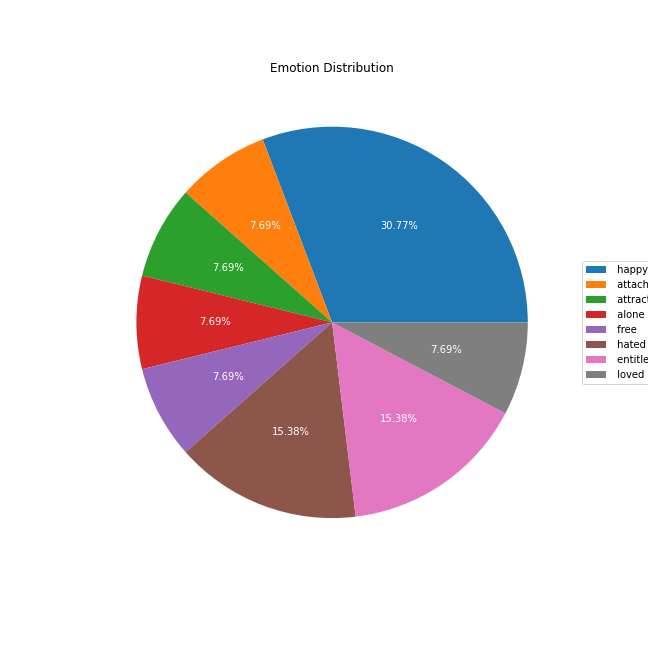

In [6]:
#Creating instance of a "sentiment_analyzer" object and calling its "execute" method
sentiment_analyzer_obj=sentiment_analyzer()
sentiment_analyzer_obj.execute()
